# Custom Layers in Keras

### 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.3.1


### 2. Loading and Visualizing Dataset

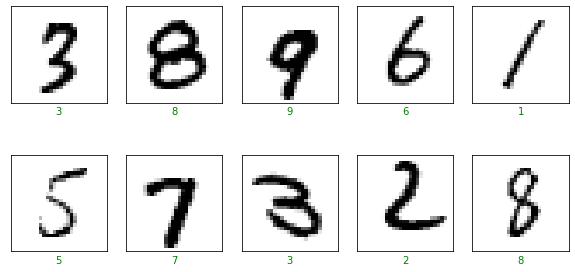

In [3]:
(x_train, y_train), (x_test, y_test) = utils.load_data()

utils.plot_random_examples(x_train, y_train).show()

### 3. Creating a Custom Layer

In [4]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='minimum', 
            shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)

### 4. Model

In [5]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if not use_prelu:
        model.add(tf.keras.layers.ReLU())
    else:
        model.add(ParametricRelu())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


### 5. Model Training

In [6]:
print('Initial alpha:', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

print('Final alpha:', model.layers[1].get_weights())

Initial alpha: [array([0.], dtype=float32)]
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.9174 - val_loss: 0.1562 - val_accuracy: 0.9524
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1295 - accuracy: 0.9622 - val_loss: 0.1154 - val_accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0916 - accuracy: 0.9717 - val_loss: 0.1023 - val_accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0719 - accuracy: 0.9781 - val_loss: 0.1097 - val_accuracy: 0.9662
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9820 - val_loss: 0.0925 - val_accuracy: 0.9720
Final alpha: [array([-0.8665963], dtype=float32)]


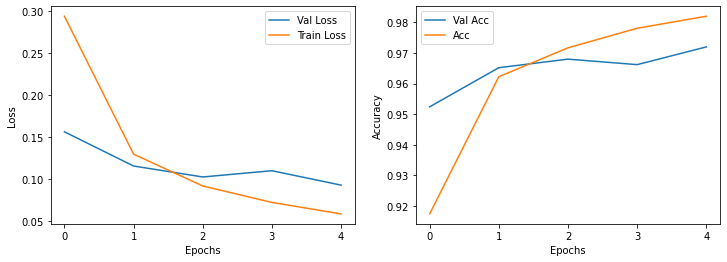

In [7]:
utils.plot_results(h).show()

### 6. Comparing with ReLU

In [8]:
model = create_model(use_prelu=False)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.9166 - val_loss: 0.1629 - val_accuracy: 0.9515
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1373 - accuracy: 0.9588 - val_loss: 0.1168 - val_accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0982 - accuracy: 0.9707 - val_loss: 0.1000 - val_accuracy: 0.9697
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0782 - accuracy: 0.9770 - val_loss: 0.1001 - val_accuracy: 0.9707
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9803 - val_loss: 0.0858 - val_accuracy: 0.9747


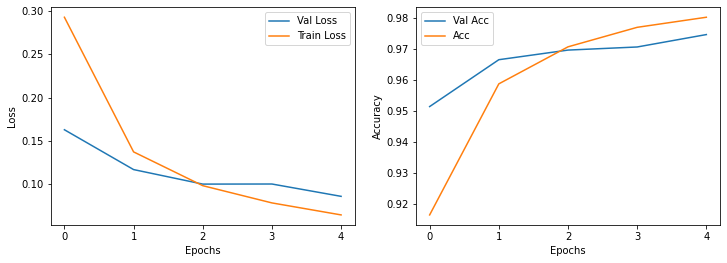

In [10]:
utils.plot_results(h).show()